# Get data of heart diase

In [248]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# L·∫•y data v√† ti·ªÅn x·ª≠ l√Ω

In [249]:
df = pd.read_csv("datasets/heart_disease.csv")
df = df.drop(columns=["Education", "Income", "AnyHealthcare", "NoDocbcCost"])


## C√°c thu·ªôc t√≠nh c·ªßa dataset

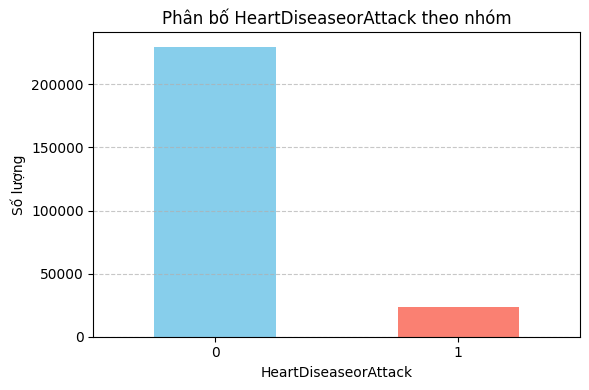

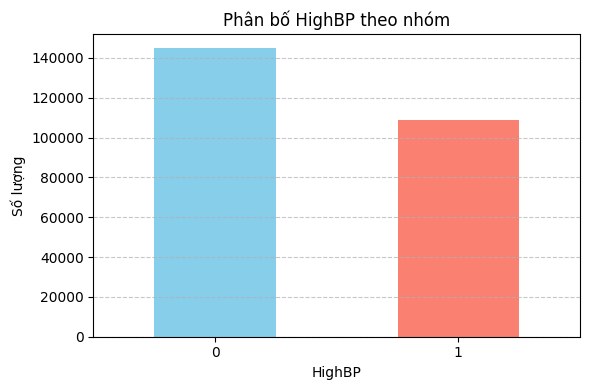

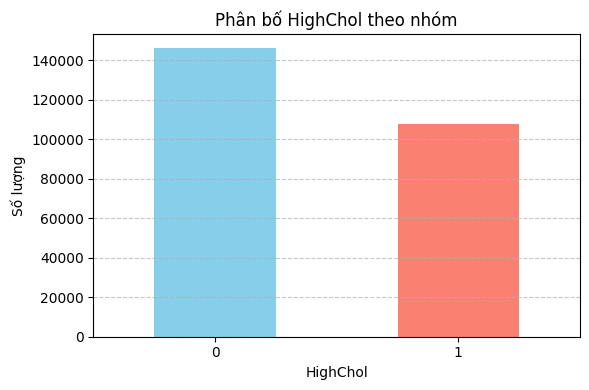

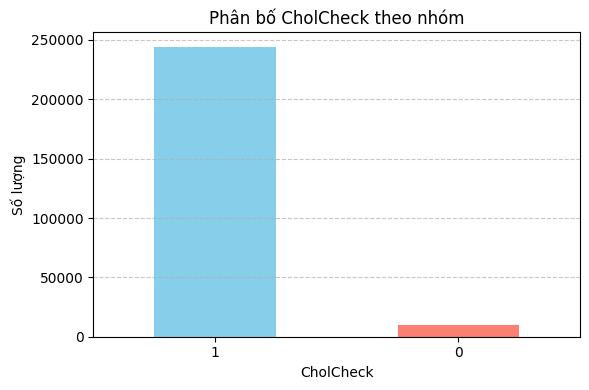

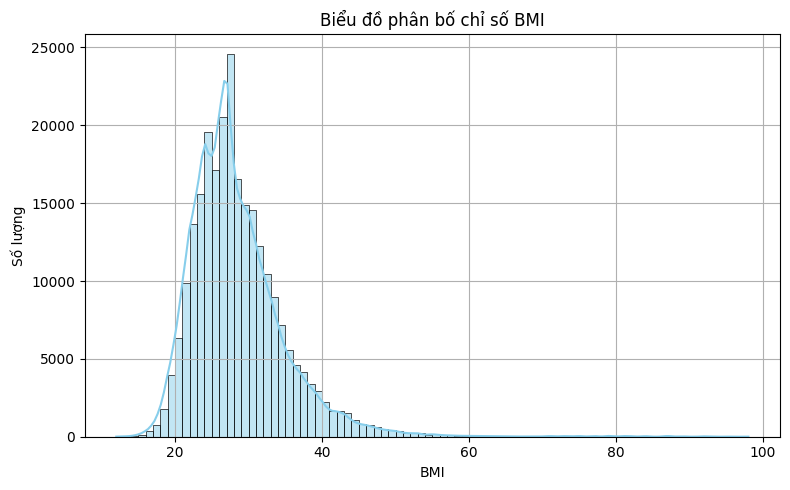

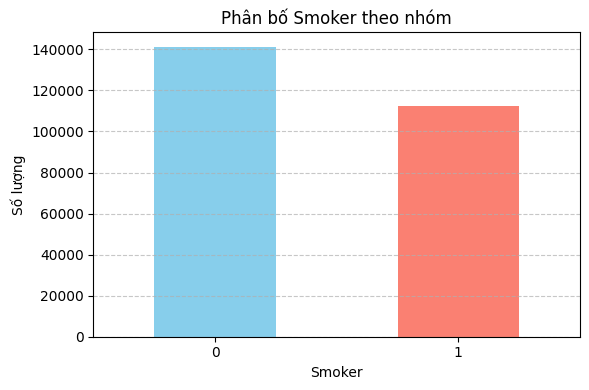

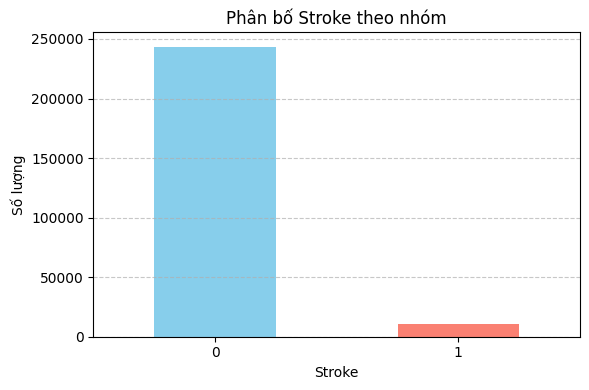

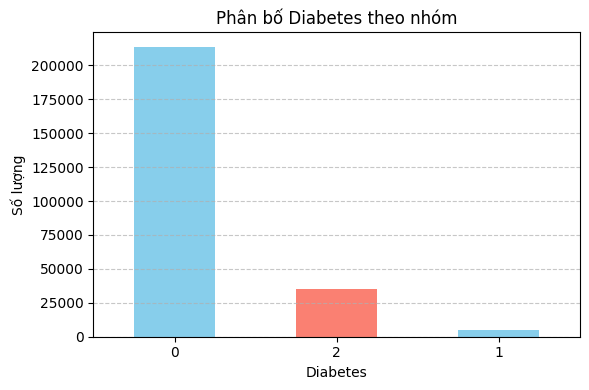

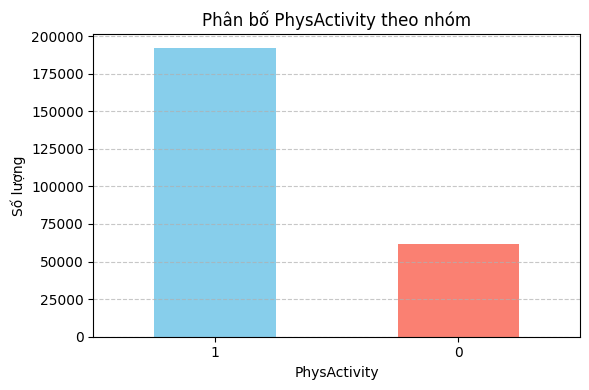

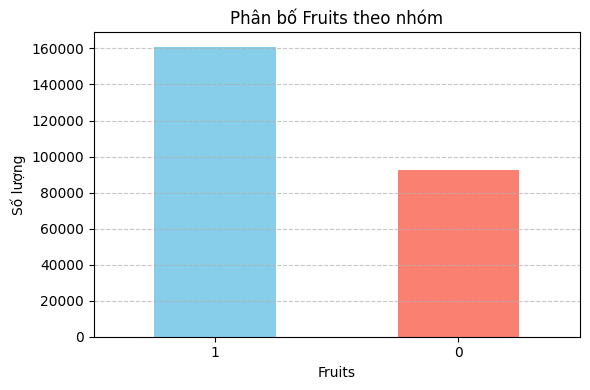

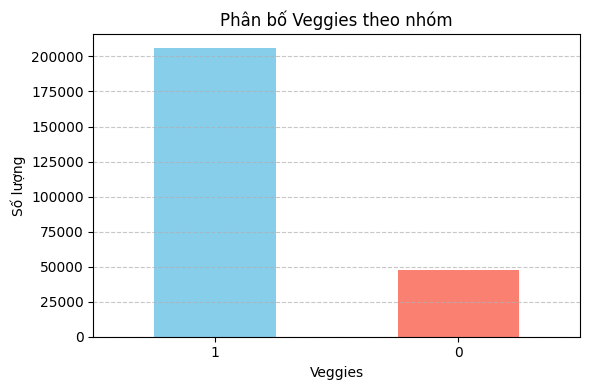

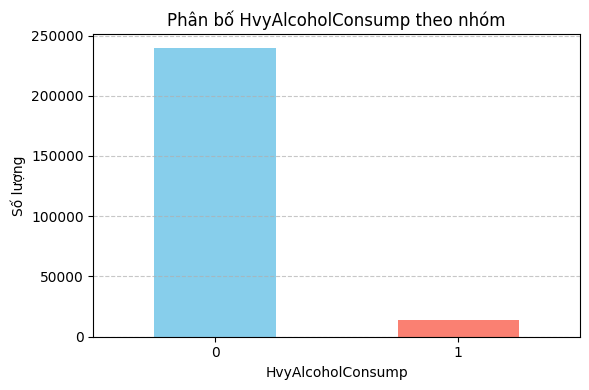

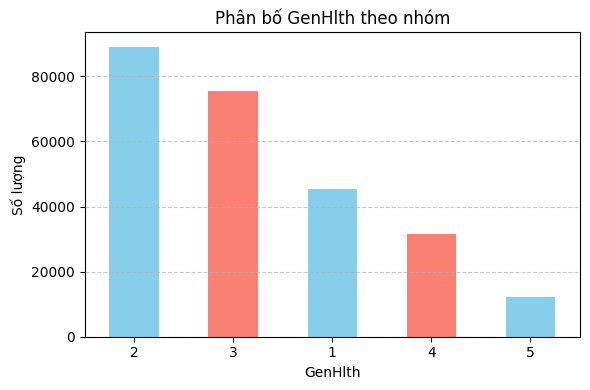

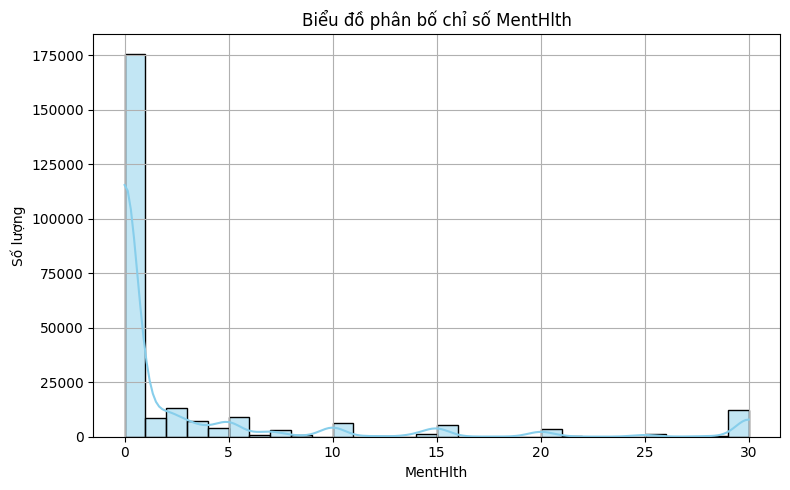

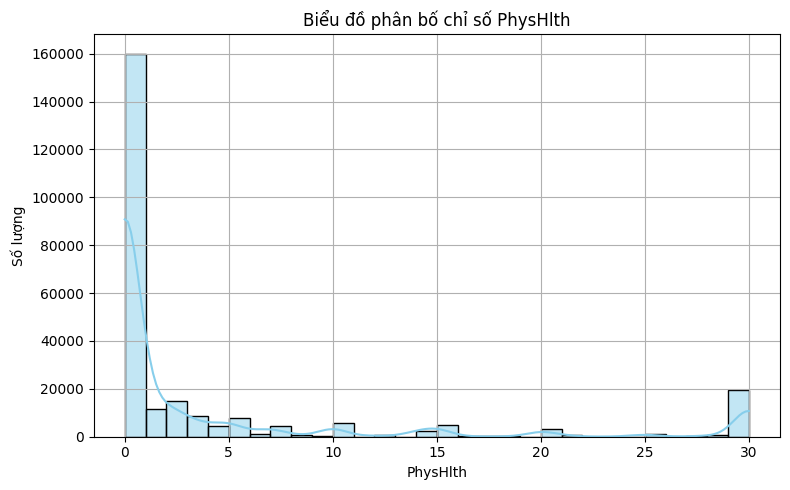

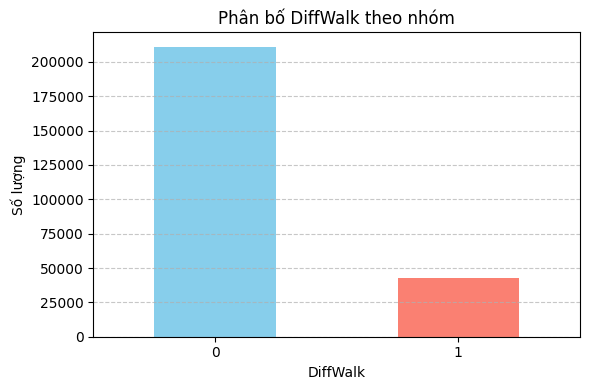

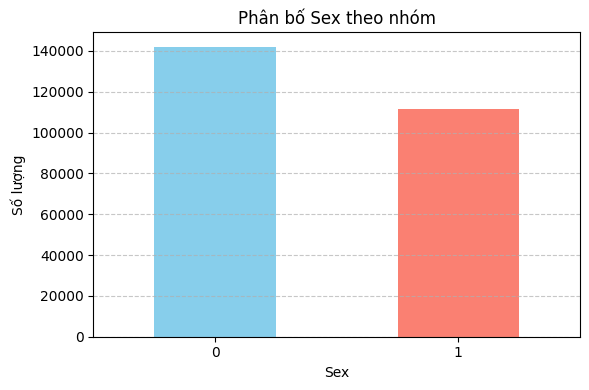

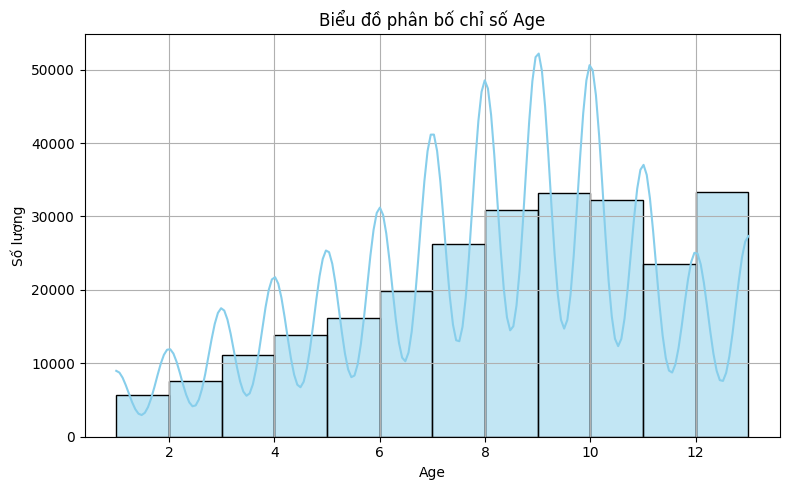

In [250]:
for x in df.columns:
    df[x] = df[x].astype(int)
    target_counts = df[x].value_counts()
    if target_counts.shape[0] > 6:
        min_bmi = int(df[x].min())
        max_bmi = int(df[x].max())
        plt.figure(figsize=(8, 5))
        sns.histplot(df[x], bins=range(min_bmi, max_bmi + 1), kde=True, color='skyblue', edgecolor='black')

        plt.title(f'Bi·ªÉu ƒë·ªì ph√¢n b·ªë ch·ªâ s·ªë {x}')
        plt.xlabel(f'{x}')
        plt.ylabel('S·ªë l∆∞·ª£ng')
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    else:
        plt.figure(figsize=(6,4))
        target_counts.plot(kind='bar', color=['skyblue', 'salmon'])
        plt.title(f"Ph√¢n b·ªë {x} theo nh√≥m")
        plt.xlabel(f'{x}')
        plt.ylabel("S·ªë l∆∞·ª£ng")
        plt.xticks(rotation=0)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

HeartDiseaseorAttack    object
HighBP                   int32
HighChol                 int32
CholCheck                int32
BMI                      int32
Smoker                   int32
Stroke                   int32
Diabetes                 int32
PhysActivity             int32
Fruits                   int32
Veggies                  int32
HvyAlcoholConsump        int32
GenHlth                  int32
MentHlth                 int32
PhysHlth                 int32
DiffWalk                 int32
Sex                      int32
Age                      int32
dtype: object


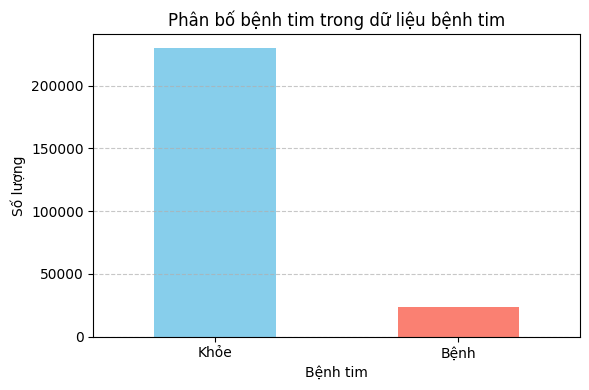

In [251]:
df['HeartDiseaseorAttack'] = df['HeartDiseaseorAttack'].map({1: 'B·ªánh', 0: 'Kh·ªèe'})
# df['Sex'] = df['Sex'].map({1: 'Nam', 0: 'N·ªØ'})
print(df.dtypes)

target_counts = df['HeartDiseaseorAttack'].value_counts()

plt.figure(figsize=(6,4))
target_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Ph√¢n b·ªë b·ªánh tim trong d·ªØ li·ªáu b·ªánh tim")
plt.xlabel("B·ªánh tim")
plt.ylabel("S·ªë l∆∞·ª£ng")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Decision tree

In [252]:
X = df.drop('HeartDiseaseorAttack', axis=1)
y = df['HeartDiseaseorAttack']

# N·∫øu c·ªôt n√†o l√† d·∫°ng categorical (v√≠ d·ª•: sex, cp...), encode n√≥ n·∫øu c·∫ßn
# ·ªû ƒë√¢y DecisionTree c·ªßa sklearn c√≥ th·ªÉ x·ª≠ l√Ω numeric n√™n ta c√≥ th·ªÉ gi·ªØ nguy√™n n·∫øu l√† s·ªë
# N·∫øu mu·ªën r√µ r√†ng h∆°n: encode c·ªôt 'sex' l·∫°i
X['Sex'] = X['Sex'].astype(int)  # ch·∫Øc ch·∫Øn n√≥ l√† int

# üß™ Chia train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# üå≥ T·∫°o v√† train m√¥ h√¨nh Decision Tree
model = DecisionTreeClassifier(max_depth=11, random_state=42)
model.fit(X_train, y_train)

# üß† D·ª± ƒëo√°n
y_pred = model.predict(X_test)

# üìä ƒê√°nh gi√°
print("üéØ Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# üå≤ V·∫Ω c√¢y quy·∫øt ƒë·ªãnh
# plt.figure(figsize=(20,10))
# plot_tree(model, feature_names=X.columns, class_names=['0', '1'], filled=True)
# plt.title("C√¢y quy·∫øt ƒë·ªãnh d·ª± ƒëo√°n b·ªánh tim")
# plt.show()

üéØ Accuracy: 0.9035201829076002
              precision    recall  f1-score   support

        B·ªánh       0.45      0.12      0.18      4768
        Kh·ªèe       0.91      0.99      0.95     45968

    accuracy                           0.90     50736
   macro avg       0.68      0.55      0.57     50736
weighted avg       0.87      0.90      0.88     50736



# Navie Bayes

üéØ Accuracy: 0.8239514348785872
              precision    recall  f1-score   support

        B·ªánh       0.28      0.54      0.36      4768
        Kh·ªèe       0.95      0.85      0.90     45968

    accuracy                           0.82     50736
   macro avg       0.61      0.70      0.63     50736
weighted avg       0.88      0.82      0.85     50736



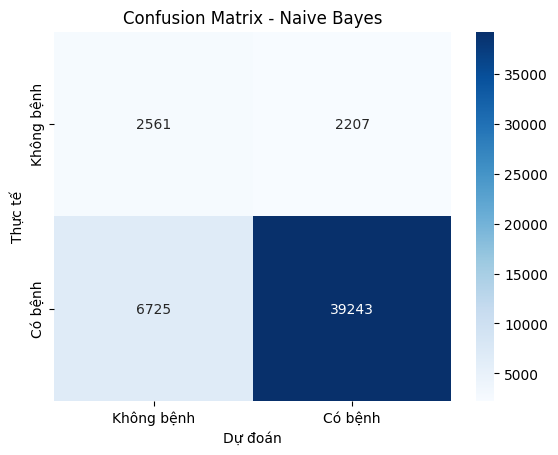

In [253]:
# üéØ T√°ch input v√† output
X = df.drop('HeartDiseaseorAttack', axis=1)
y = df['HeartDiseaseorAttack']

# üß™ Chia train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# üì¶ Kh·ªüi t·∫°o v√† train m√¥ h√¨nh Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# üß† D·ª± ƒëo√°n
y_pred = nb_model.predict(X_test)
y_prob = model.predict_proba(X_test)
my_y = list(zip(y_pred, map(lambda x: x[0] if x[0]>0.5 else x[1], y_prob)))
# In ra d·ª± ƒëo√°n v√† x√°c su·∫•t

# for pred, prob in my_y.:
#     print(f"D·ª± ƒëo√°n: {pred}, X√°c su·∫•t: {prob:.2f}")
# üìä ƒê√°nh gi√°
print("üéØ Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# üî• Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Kh√¥ng b·ªánh", "C√≥ b·ªánh"], yticklabels=["Kh√¥ng b·ªánh", "C√≥ b·ªánh"])
plt.xlabel("D·ª± ƒëo√°n")
plt.ylabel("Th·ª±c t·∫ø")
plt.title("Confusion Matrix - Naive Bayes")
plt.show()